# Visualising Geographic Data

Latitude and longitude points on two-dimensional maps describe points on a sphere, to plot the values on a two-dimensional plane, we need to project these points on a map: convert the latitude and longitude into Cartesian coordinates.

From Dataquest:"When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs here. We'll use the Mercator projection, because it is commonly used by popular mapping software."

In [17]:
import warnings
warnings.filterwarnings('ignore')

The datasets come from the openflights website: https://openflights.org/data.html (`.dat` files)

Overview of most important columns in the following files:
* airlines.csv - data on each airline.

    * country - where the airline is headquartered.
    * active - if the airline is still active.
* airports.csv - data on each airport.

    * name - name of the airport.
    * city - city the airport is located.
    * country - country the airport is located.
    * code - unique airport code.
    * latitude - latitude value.
    * longitude - longitude value.
* routes.csv - data on each flight route.

    * airline - airline for the route.
    * source - starting city for the route.
    * dest - destination city for the route.


In [1]:
import pandas as pd
airlines = pd.read_csv('data/airlines.csv')
airports = pd.read_csv('data/airports.csv')
routes = pd.read_csv('data/routes.csv')
print(airlines.head(3))
print(airports.head(3))
print(routes.head(3))

   id            name alias iata icao callsign        country active
0   1  Private flight    \N    -  NaN      NaN            NaN      Y
1   2     135 Airways    \N  NaN  GNL  GENERAL  United States      N
2   3   1Time Airline    \N   1T  RNX  NEXTIME   South Africa      Y
   id         name         city           country code  icao  latitude  \
0   1       Goroka       Goroka  Papua New Guinea  GKA  AYGA -6.081689   
1   2       Madang       Madang  Papua New Guinea  MAG  AYMD -5.207083   
2   3  Mount Hagen  Mount Hagen  Papua New Guinea  HGU  AYMH -5.826789   

    longitude  altitude  offset dst              timezone  
0  145.391881    5282.0    10.0   U  Pacific/Port_Moresby  
1  145.788700      20.0    10.0   U  Pacific/Port_Moresby  
2  144.295861    5388.0    10.0   U  Pacific/Port_Moresby  
  airline airline_id source source_id dest dest_id codeshare  stops equipment
0      2B        410    AER      2965  KZN    2990       NaN    0.0       CR2
1      2B        410    ASF    

## Using Basemap 

Basemap is an extension to Matplotlib that makes it easier to work with geographic data.

Installing basemap (with Anaconda), last version to overcome the deprecated warning about the `ishold()` and `hold` methods: 
`conda install -c conda-forge basemap`

To create a new instance of the basemap class, we call the basemap constructor assigning the following parameters:

* projection: the map projection.
* llcrnrlat: latitude of lower left hand corner of the desired map domain
* urcrnrlat: latitude of upper right hand corner of the desired map domain
* llcrnrlon: longitude of lower left hand corner of the desired map domain
* urcrnrlon: longitude of upper right hand corner of the desired map domain

In [2]:
from mpl_toolkits.basemap import Basemap

/opt/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


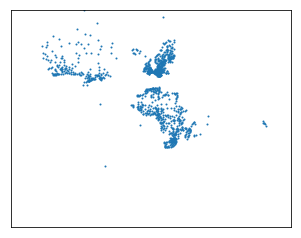

In [3]:
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x,y,s=1)
plt.show()

The file, geo_routes.csv, is provided by dataquest and contains the latitude and longitude values corresponding to the source and destination airports for each route: "To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. While the routes dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (airports).

To make things easier, we've created a new CSV file called geo_routes.csv that contains the latitude and longitude values corresponding to the source and destination airports for each route. We've also removed some columns we won't be working with."

In [5]:

geo_routes = pd.read_csv('data/geo_routes.csv')
print(geo_routes.info())
print(geo_routes.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 8 columns):
airline      1562 non-null object
source       1562 non-null object
dest         1562 non-null object
equipment    1562 non-null object
start_lon    1562 non-null float64
end_lon      1562 non-null float64
start_lat    1561 non-null float64
end_lat      1561 non-null float64
dtypes: float64(4), object(4)
memory usage: 97.7+ KB
None
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


`basemap.drawgreatcircle()` method isn't able to create great circles properly when they go outside of the map boundaries.

Let us visualise the flights from the Konrad-Adenauer airport in Bonn ('CGN'):

/opt/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


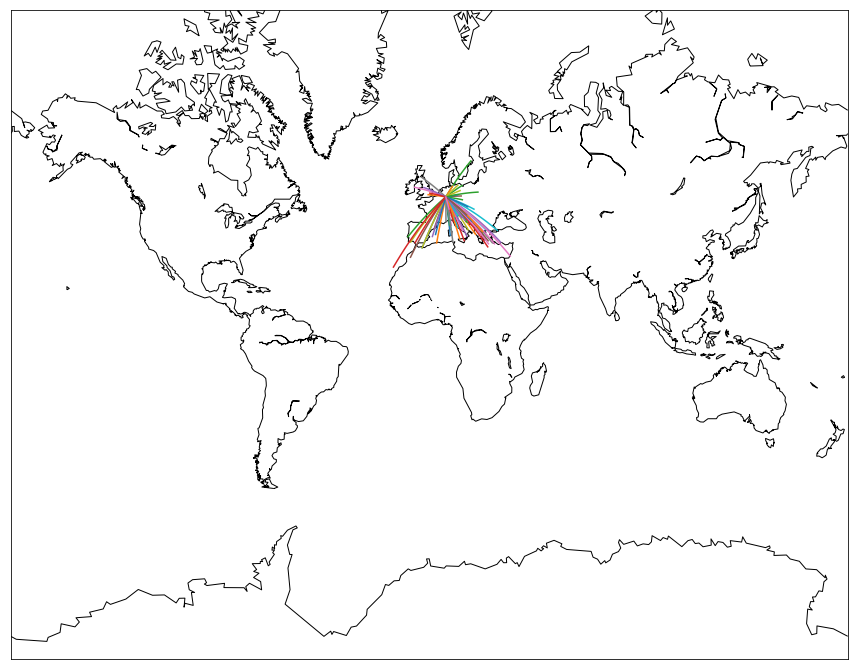

In [7]:
def create_great_circles(df):
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
    m.drawcoastlines()
    for index, row in df.iterrows():
        start_lat = row['start_lat']
        end_lat = row['end_lat']
        end_lon = row['end_lon']
        start_lon = row['start_lon']
        if end_lat<180 and start_lat<180 and (end_lon-start_lon)<180:
            m.drawgreatcircle(start_lon,start_lat,end_lon, end_lat)
            
dfw = geo_routes[geo_routes['source']=='CGN'] 
#print(geo_routes['source'].value_counts())
fig, ax = plt.subplots(figsize=(15,20))

create_great_circles(dfw)

plt.show()

Plotting tools:
* Creating 3D plots using Plotly: https://plot.ly/python/3d-scatter-plots/
* Creating interactive visualizations using bokeh: http://bokeh.pydata.org/en/latest/
* Creating interactive map visualizations using folium: https://folium.readthedocs.io/en/latest/
The art and science of data visualization:
* Visual Display of Quantitative Information
* Visual Explanations: Images and Quantities, Evidence and Narrative